# Problem Statement
<hr>
<h1>Develop a predictive model using G-Store dataset to predict the total revenue for the customer that helps in better user of marketing budget and also interpret the most impacting element on the total revenue prediction using different model.</h1>



In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import json
import joblib
import datetime as datetime
from sklearn import preprocessing
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn import metrics
import warnings

In [2]:
%matplotlib inline
plt.style.use('ggplot')
warnings.filterwarnings('ignore')
le=preprocessing.LabelEncoder()

# Load data

In [3]:
train=pd.read_csv("data/train.csv")

In [4]:
test=pd.read_csv("data/test.csv")

Get records and columns

In [5]:
test.shape

(804684, 12)

# Let's Flatten json data for device, geoNetwork, totals and trafficSource

device data

In [6]:
train['device'].head()

0    {"browser": "Chrome", "browserVersion": "not a...
1    {"browser": "Firefox", "browserVersion": "not ...
2    {"browser": "Chrome", "browserVersion": "not a...
3    {"browser": "UC Browser", "browserVersion": "n...
4    {"browser": "Chrome", "browserVersion": "not a...
Name: device, dtype: object

device json fields

In [7]:
totals_list=train['device'].apply(json.loads).tolist()
keys=[]

for i in totals_list:
    for j in list(i.keys()):
        if j not in keys:
            keys.append(j)
keys

['browser',
 'browserVersion',
 'browserSize',
 'operatingSystem',
 'operatingSystemVersion',
 'isMobile',
 'mobileDeviceBranding',
 'mobileDeviceModel',
 'mobileInputSelector',
 'mobileDeviceInfo',
 'mobileDeviceMarketingName',
 'flashVersion',
 'language',
 'screenColors',
 'screenResolution',
 'deviceCategory']

json array data

In [8]:
train['device'].apply(json.loads)[0]

{'browser': 'Chrome',
 'browserVersion': 'not available in demo dataset',
 'browserSize': 'not available in demo dataset',
 'operatingSystem': 'Windows',
 'operatingSystemVersion': 'not available in demo dataset',
 'isMobile': False,
 'mobileDeviceBranding': 'not available in demo dataset',
 'mobileDeviceModel': 'not available in demo dataset',
 'mobileInputSelector': 'not available in demo dataset',
 'mobileDeviceInfo': 'not available in demo dataset',
 'mobileDeviceMarketingName': 'not available in demo dataset',
 'flashVersion': 'not available in demo dataset',
 'language': 'not available in demo dataset',
 'screenColors': 'not available in demo dataset',
 'screenResolution': 'not available in demo dataset',
 'deviceCategory': 'desktop'}

Let's create a new DataFrame for device fields with data 

In [9]:
device_df=pd.DataFrame(train['device'].apply(json.loads).tolist())[['browser','deviceCategory','operatingSystem','language','browserVersion','browserSize','mobileDeviceMarketingName','mobileDeviceModel','screenResolution']]
device_df.head()

,browser,deviceCategory,operatingSystem,language,browserVersion,browserSize,mobileDeviceMarketingName,mobileDeviceModel,screenResolution
0,Chrome,desktop,Windows,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset
1,Firefox,desktop,Macintosh,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset
2,Chrome,desktop,Windows,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset
3,UC Browser,desktop,Linux,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset
4,Chrome,mobile,Android,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset


geoNetwork data

In [10]:
train['geoNetwork'].head()

0    {"continent": "Asia", "subContinent": "Western...
1    {"continent": "Oceania", "subContinent": "Aust...
2    {"continent": "Europe", "subContinent": "South...
3    {"continent": "Asia", "subContinent": "Southea...
4    {"continent": "Europe", "subContinent": "North...
Name: geoNetwork, dtype: object

geoNetwork json fields

In [11]:
geoNetwork_list=train['geoNetwork'].apply(json.loads).tolist()
keys=[]
for i in geoNetwork_list:
    for j in list(i.keys()):
        if j not in keys:
            keys.append(j)

keys

['continent',
 'subContinent',
 'country',
 'region',
 'metro',
 'city',
 'cityId',
 'networkDomain',
 'latitude',
 'longitude',
 'networkLocation']

geoNetwork json data

In [12]:
train['geoNetwork'].apply(json.loads)[0]

{'continent': 'Asia',
 'subContinent': 'Western Asia',
 'country': 'Turkey',
 'region': 'Izmir',
 'metro': '(not set)',
 'city': 'Izmir',
 'cityId': 'not available in demo dataset',
 'networkDomain': 'ttnet.com.tr',
 'latitude': 'not available in demo dataset',
 'longitude': 'not available in demo dataset',
 'networkLocation': 'not available in demo dataset'}

Let's create a new DataFrame for geoNetwork fields with data i.e city,continent,country,region,subContinent

In [13]:
geoNetwork_df=pd.DataFrame(train['geoNetwork'].apply(json.loads).tolist())[['continent','subContinent','region','country','city','metro','networkLocation','latitude','longitude','networkDomain']]
geoNetwork_df.head()

,continent,subContinent,region,country,city,metro,networkLocation,latitude,longitude,networkDomain
0,Asia,Western Asia,Izmir,Turkey,Izmir,(not set),not available in demo dataset,not available in demo dataset,not available in demo dataset,ttnet.com.tr
1,Oceania,Australasia,not available in demo dataset,Australia,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,dodo.net.au
2,Europe,Southern Europe,Community of Madrid,Spain,Madrid,(not set),not available in demo dataset,not available in demo dataset,not available in demo dataset,unknown.unknown
3,Asia,Southeast Asia,not available in demo dataset,Indonesia,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,unknown.unknown
4,Europe,Northern Europe,not available in demo dataset,United Kingdom,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,unknown.unknown


totals data

In [14]:
train['totals'].head()

0    {"visits": "1", "hits": "1", "pageviews": "1",...
1    {"visits": "1", "hits": "1", "pageviews": "1",...
2    {"visits": "1", "hits": "1", "pageviews": "1",...
3    {"visits": "1", "hits": "1", "pageviews": "1",...
4    {"visits": "1", "hits": "1", "pageviews": "1",...
Name: totals, dtype: object

totals json fields

In [15]:
totals_list=train['totals'].apply(json.loads).tolist()
keys=[]
for i in totals_list:
    for j in list(i.keys()):
        if j not in keys:
            keys.append(j)
            
keys

['visits', 'hits', 'pageviews', 'bounces', 'newVisits', 'transactionRevenue']

totals json array details

In [16]:
train['totals'].apply(json.loads)[0]

{'visits': '1',
 'hits': '1',
 'pageviews': '1',
 'bounces': '1',
 'newVisits': '1'}

Let's create a new DataFrame for totals fields with data i.e bounces,hits,newVisits,pageviews,visits,transactionRevenue

In [17]:
totals_df=pd.DataFrame(train['totals'].apply(json.loads).tolist())[['bounces','hits','newVisits','pageviews','visits','transactionRevenue']]
totals_df.head()

,bounces,hits,newVisits,pageviews,visits,transactionRevenue
0,1,1,1,1,1,NaN
1,1,1,1,1,1,NaN
2,1,1,1,1,1,NaN
3,1,1,1,1,1,NaN
4,1,1,NaN,1,1,NaN


trafficCource data

In [18]:
train['trafficSource'].head()

0    {"campaign": "(not set)", "source": "google", ...
1    {"campaign": "(not set)", "source": "google", ...
2    {"campaign": "(not set)", "source": "google", ...
3    {"campaign": "(not set)", "source": "google", ...
4    {"campaign": "(not set)", "source": "google", ...
Name: trafficSource, dtype: object

trafficSource json fields

In [19]:
trafficSource_list=train['trafficSource'].apply(json.loads).tolist()
keys=[]
for i in trafficSource_list:
    for j in list(i.keys()):
        if j not in keys:
            keys.append(j)
            
keys

['campaign',
 'source',
 'medium',
 'keyword',
 'adwordsClickInfo',
 'isTrueDirect',
 'referralPath',
 'adContent',
 'campaignCode']

trafficSource json array

In [20]:
train['trafficSource'].apply(json.loads)[0]

{'campaign': '(not set)',
 'source': 'google',
 'medium': 'organic',
 'keyword': '(not provided)',
 'adwordsClickInfo': {'criteriaParameters': 'not available in demo dataset'}}

Let's flatten the fields first before we flatten the adwordsClickInfo

In [21]:
trafficSource_df=pd.DataFrame(train['trafficSource'].apply(json.loads).tolist())[['adwordsClickInfo','campaign','keyword','medium','source','isTrueDirect','campaignCode','referralPath','adContent']]
trafficSource_df.head()

,adwordsClickInfo,campaign,keyword,medium,source,isTrueDirect,campaignCode,referralPath,adContent
0,{'criteriaParameters': 'not available in demo ...,(not set),(not provided),organic,google,NaN,NaN,NaN,NaN
1,{'criteriaParameters': 'not available in demo ...,(not set),(not provided),organic,google,NaN,NaN,NaN,NaN
2,{'criteriaParameters': 'not available in demo ...,(not set),(not provided),organic,google,NaN,NaN,NaN,NaN
3,{'criteriaParameters': 'not available in demo ...,(not set),google + online,organic,google,NaN,NaN,NaN,NaN
4,{'criteriaParameters': 'not available in demo ...,(not set),(not provided),organic,google,True,NaN,NaN,NaN


adwordsClickInfo json fields

In [22]:
adwordsClickInfo_list=trafficSource_df['adwordsClickInfo'].apply(json.dumps).apply(json.loads).tolist()
keys=[]
for i in adwordsClickInfo_list:
    for j in i.keys():
        if j not in keys:
            keys.append(j)
            
keys

['criteriaParameters',
 'page',
 'slot',
 'gclId',
 'adNetworkType',
 'isVideoAd',
 'targetingCriteria']

adwordsClickInfo json array data

In [23]:
trafficSource_df['adwordsClickInfo'].apply(json.dumps).apply(json.loads)[0]

{'criteriaParameters': 'not available in demo dataset'}

Let's flatten the adwordsClickInfo fields 

In [24]:
adwordsClickInfo_df=pd.DataFrame(trafficSource_df['adwordsClickInfo'].apply(json.dumps).apply(json.loads).tolist())[['criteriaParameters','page','isVideoAd','gclId','adNetworkType','slot','targetingCriteria']]
adwordsClickInfo_df.head()

,criteriaParameters,page,isVideoAd,gclId,adNetworkType,slot,targetingCriteria
0,not available in demo dataset,NaN,NaN,NaN,NaN,NaN,NaN
1,not available in demo dataset,NaN,NaN,NaN,NaN,NaN,NaN
2,not available in demo dataset,NaN,NaN,NaN,NaN,NaN,NaN
3,not available in demo dataset,NaN,NaN,NaN,NaN,NaN,NaN
4,not available in demo dataset,NaN,NaN,NaN,NaN,NaN,NaN


# Joining DataFrames

Combine the DataFrames

In [25]:
df=pd.concat([train[['channelGrouping', 'date', 'device', 'fullVisitorId', 'geoNetwork','sessionId', 'socialEngagementType', 'totals', 'trafficSource',
       'visitId', 'visitNumber', 'visitStartTime']], device_df, geoNetwork_df, totals_df, trafficSource_df,adwordsClickInfo_df], axis=1)

In [26]:
df.head()

,channelGrouping,date,device,fullVisitorId,geoNetwork,sessionId,socialEngagementType,totals,trafficSource,visitId,...,campaignCode,referralPath,adContent,criteriaParameters,page,isVideoAd,gclId,adNetworkType,slot,targetingCriteria
0,Organic Search,20160902,"{""browser"": ""Chrome"", ""browserVersion"": ""not a...",1131660440785968503,"{""continent"": ""Asia"", ""subContinent"": ""Western...",1131660440785968503_1472830385,Not Socially Engaged,"{""visits"": ""1"", ""hits"": ""1"", ""pageviews"": ""1"",...","{""campaign"": ""(not set)"", ""source"": ""google"", ...",1472830385,...,NaN,NaN,NaN,not available in demo dataset,NaN,NaN,NaN,NaN,NaN,NaN
1,Organic Search,20160902,"{""browser"": ""Firefox"", ""browserVersion"": ""not ...",377306020877927890,"{""continent"": ""Oceania"", ""subContinent"": ""Aust...",377306020877927890_1472880147,Not Socially Engaged,"{""visits"": ""1"", ""hits"": ""1"", ""pageviews"": ""1"",...","{""campaign"": ""(not set)"", ""source"": ""google"", ...",1472880147,...,NaN,NaN,NaN,not available in demo dataset,NaN,NaN,NaN,NaN,NaN,NaN
2,Organic Search,20160902,"{""browser"": ""Chrome"", ""browserVersion"": ""not a...",3895546263509774583,"{""continent"": ""Europe"", ""subContinent"": ""South...",3895546263509774583_1472865386,Not Socially Engaged,"{""visits"": ""1"", ""hits"": ""1"", ""pageviews"": ""1"",...","{""campaign"": ""(not set)"", ""source"": ""google"", ...",1472865386,...,NaN,NaN,NaN,not available in demo dataset,NaN,NaN,NaN,NaN,NaN,NaN
3,Organic Search,20160902,"{""browser"": ""UC Browser"", ""browserVersion"": ""n...",4763447161404445595,"{""continent"": ""Asia"", ""subContinent"": ""Southea...",4763447161404445595_1472881213,Not Socially Engaged,"{""visits"": ""1"", ""hits"": ""1"", ""pageviews"": ""1"",...","{""campaign"": ""(not set)"", ""source"": ""google"", ...",1472881213,...,NaN,NaN,NaN,not available in demo dataset,NaN,NaN,NaN,NaN,NaN,NaN
4,Organic Search,20160902,"{""browser"": ""Chrome"", ""browserVersion"": ""not a...",27294437909732085,"{""continent"": ""Europe"", ""subContinent"": ""North...",27294437909732085_1472822600,Not Socially Engaged,"{""visits"": ""1"", ""hits"": ""1"", ""pageviews"": ""1"",...","{""campaign"": ""(not set)"", ""source"": ""google"", ...",1472822600,...,NaN,NaN,NaN,not available in demo dataset,NaN,NaN,NaN,NaN,NaN,NaN


In [27]:
df.columns

Index(['channelGrouping', 'date', 'device', 'fullVisitorId', 'geoNetwork',
       'sessionId', 'socialEngagementType', 'totals', 'trafficSource',
       'visitId', 'visitNumber', 'visitStartTime', 'browser', 'deviceCategory',
       'operatingSystem', 'language', 'browserVersion', 'browserSize',
       'mobileDeviceMarketingName', 'mobileDeviceModel', 'screenResolution',
       'continent', 'subContinent', 'region', 'country', 'city', 'metro',
       'networkLocation', 'latitude', 'longitude', 'networkDomain', 'bounces',
       'hits', 'newVisits', 'pageviews', 'visits', 'transactionRevenue',
       'adwordsClickInfo', 'campaign', 'keyword', 'medium', 'source',
       'isTrueDirect', 'campaignCode', 'referralPath', 'adContent',
       'criteriaParameters', 'page', 'isVideoAd', 'gclId', 'adNetworkType',
       'slot', 'targetingCriteria'],
      dtype='object')

In [28]:
df.shape

(903653, 53)

# Working with Date and Time

Extract Date and Time

In [29]:
df['date']=pd.to_datetime(df['date'], format="%Y%m%d")
df.head()

,channelGrouping,date,device,fullVisitorId,geoNetwork,sessionId,socialEngagementType,totals,trafficSource,visitId,...,campaignCode,referralPath,adContent,criteriaParameters,page,isVideoAd,gclId,adNetworkType,slot,targetingCriteria
0,Organic Search,2016-09-02,"{""browser"": ""Chrome"", ""browserVersion"": ""not a...",1131660440785968503,"{""continent"": ""Asia"", ""subContinent"": ""Western...",1131660440785968503_1472830385,Not Socially Engaged,"{""visits"": ""1"", ""hits"": ""1"", ""pageviews"": ""1"",...","{""campaign"": ""(not set)"", ""source"": ""google"", ...",1472830385,...,NaN,NaN,NaN,not available in demo dataset,NaN,NaN,NaN,NaN,NaN,NaN
1,Organic Search,2016-09-02,"{""browser"": ""Firefox"", ""browserVersion"": ""not ...",377306020877927890,"{""continent"": ""Oceania"", ""subContinent"": ""Aust...",377306020877927890_1472880147,Not Socially Engaged,"{""visits"": ""1"", ""hits"": ""1"", ""pageviews"": ""1"",...","{""campaign"": ""(not set)"", ""source"": ""google"", ...",1472880147,...,NaN,NaN,NaN,not available in demo dataset,NaN,NaN,NaN,NaN,NaN,NaN
2,Organic Search,2016-09-02,"{""browser"": ""Chrome"", ""browserVersion"": ""not a...",3895546263509774583,"{""continent"": ""Europe"", ""subContinent"": ""South...",3895546263509774583_1472865386,Not Socially Engaged,"{""visits"": ""1"", ""hits"": ""1"", ""pageviews"": ""1"",...","{""campaign"": ""(not set)"", ""source"": ""google"", ...",1472865386,...,NaN,NaN,NaN,not available in demo dataset,NaN,NaN,NaN,NaN,NaN,NaN
3,Organic Search,2016-09-02,"{""browser"": ""UC Browser"", ""browserVersion"": ""n...",4763447161404445595,"{""continent"": ""Asia"", ""subContinent"": ""Southea...",4763447161404445595_1472881213,Not Socially Engaged,"{""visits"": ""1"", ""hits"": ""1"", ""pageviews"": ""1"",...","{""campaign"": ""(not set)"", ""source"": ""google"", ...",1472881213,...,NaN,NaN,NaN,not available in demo dataset,NaN,NaN,NaN,NaN,NaN,NaN
4,Organic Search,2016-09-02,"{""browser"": ""Chrome"", ""browserVersion"": ""not a...",27294437909732085,"{""continent"": ""Europe"", ""subContinent"": ""North...",27294437909732085_1472822600,Not Socially Engaged,"{""visits"": ""1"", ""hits"": ""1"", ""pageviews"": ""1"",...","{""campaign"": ""(not set)"", ""source"": ""google"", ...",1472822600,...,NaN,NaN,NaN,not available in demo dataset,NaN,NaN,NaN,NaN,NaN,NaN


Extract Time from visitStartTime timestamp

In [30]:
df['visitStartTime']=pd.to_datetime(df['visitStartTime'],unit='s')
df.head()

,channelGrouping,date,device,fullVisitorId,geoNetwork,sessionId,socialEngagementType,totals,trafficSource,visitId,...,campaignCode,referralPath,adContent,criteriaParameters,page,isVideoAd,gclId,adNetworkType,slot,targetingCriteria
0,Organic Search,2016-09-02,"{""browser"": ""Chrome"", ""browserVersion"": ""not a...",1131660440785968503,"{""continent"": ""Asia"", ""subContinent"": ""Western...",1131660440785968503_1472830385,Not Socially Engaged,"{""visits"": ""1"", ""hits"": ""1"", ""pageviews"": ""1"",...","{""campaign"": ""(not set)"", ""source"": ""google"", ...",1472830385,...,NaN,NaN,NaN,not available in demo dataset,NaN,NaN,NaN,NaN,NaN,NaN
1,Organic Search,2016-09-02,"{""browser"": ""Firefox"", ""browserVersion"": ""not ...",377306020877927890,"{""continent"": ""Oceania"", ""subContinent"": ""Aust...",377306020877927890_1472880147,Not Socially Engaged,"{""visits"": ""1"", ""hits"": ""1"", ""pageviews"": ""1"",...","{""campaign"": ""(not set)"", ""source"": ""google"", ...",1472880147,...,NaN,NaN,NaN,not available in demo dataset,NaN,NaN,NaN,NaN,NaN,NaN
2,Organic Search,2016-09-02,"{""browser"": ""Chrome"", ""browserVersion"": ""not a...",3895546263509774583,"{""continent"": ""Europe"", ""subContinent"": ""South...",3895546263509774583_1472865386,Not Socially Engaged,"{""visits"": ""1"", ""hits"": ""1"", ""pageviews"": ""1"",...","{""campaign"": ""(not set)"", ""source"": ""google"", ...",1472865386,...,NaN,NaN,NaN,not available in demo dataset,NaN,NaN,NaN,NaN,NaN,NaN
3,Organic Search,2016-09-02,"{""browser"": ""UC Browser"", ""browserVersion"": ""n...",4763447161404445595,"{""continent"": ""Asia"", ""subContinent"": ""Southea...",4763447161404445595_1472881213,Not Socially Engaged,"{""visits"": ""1"", ""hits"": ""1"", ""pageviews"": ""1"",...","{""campaign"": ""(not set)"", ""source"": ""google"", ...",1472881213,...,NaN,NaN,NaN,not available in demo dataset,NaN,NaN,NaN,NaN,NaN,NaN
4,Organic Search,2016-09-02,"{""browser"": ""Chrome"", ""browserVersion"": ""not a...",27294437909732085,"{""continent"": ""Europe"", ""subContinent"": ""North...",27294437909732085_1472822600,Not Socially Engaged,"{""visits"": ""1"", ""hits"": ""1"", ""pageviews"": ""1"",...","{""campaign"": ""(not set)"", ""source"": ""google"", ...",1472822600,...,NaN,NaN,NaN,not available in demo dataset,NaN,NaN,NaN,NaN,NaN,NaN


Getting year, month and day from date

In [31]:
df['year']=df['date'].dt.year
df['month']=df['date'].dt.month
df['day']=df['date'].dt.day
df.head()

,channelGrouping,date,device,fullVisitorId,geoNetwork,sessionId,socialEngagementType,totals,trafficSource,visitId,...,criteriaParameters,page,isVideoAd,gclId,adNetworkType,slot,targetingCriteria,year,month,day
0,Organic Search,2016-09-02,"{""browser"": ""Chrome"", ""browserVersion"": ""not a...",1131660440785968503,"{""continent"": ""Asia"", ""subContinent"": ""Western...",1131660440785968503_1472830385,Not Socially Engaged,"{""visits"": ""1"", ""hits"": ""1"", ""pageviews"": ""1"",...","{""campaign"": ""(not set)"", ""source"": ""google"", ...",1472830385,...,not available in demo dataset,NaN,NaN,NaN,NaN,NaN,NaN,2016,9,2
1,Organic Search,2016-09-02,"{""browser"": ""Firefox"", ""browserVersion"": ""not ...",377306020877927890,"{""continent"": ""Oceania"", ""subContinent"": ""Aust...",377306020877927890_1472880147,Not Socially Engaged,"{""visits"": ""1"", ""hits"": ""1"", ""pageviews"": ""1"",...","{""campaign"": ""(not set)"", ""source"": ""google"", ...",1472880147,...,not available in demo dataset,NaN,NaN,NaN,NaN,NaN,NaN,2016,9,2
2,Organic Search,2016-09-02,"{""browser"": ""Chrome"", ""browserVersion"": ""not a...",3895546263509774583,"{""continent"": ""Europe"", ""subContinent"": ""South...",3895546263509774583_1472865386,Not Socially Engaged,"{""visits"": ""1"", ""hits"": ""1"", ""pageviews"": ""1"",...","{""campaign"": ""(not set)"", ""source"": ""google"", ...",1472865386,...,not available in demo dataset,NaN,NaN,NaN,NaN,NaN,NaN,2016,9,2
3,Organic Search,2016-09-02,"{""browser"": ""UC Browser"", ""browserVersion"": ""n...",4763447161404445595,"{""continent"": ""Asia"", ""subContinent"": ""Southea...",4763447161404445595_1472881213,Not Socially Engaged,"{""visits"": ""1"", ""hits"": ""1"", ""pageviews"": ""1"",...","{""campaign"": ""(not set)"", ""source"": ""google"", ...",1472881213,...,not available in demo dataset,NaN,NaN,NaN,NaN,NaN,NaN,2016,9,2
4,Organic Search,2016-09-02,"{""browser"": ""Chrome"", ""browserVersion"": ""not a...",27294437909732085,"{""continent"": ""Europe"", ""subContinent"": ""North...",27294437909732085_1472822600,Not Socially Engaged,"{""visits"": ""1"", ""hits"": ""1"", ""pageviews"": ""1"",...","{""campaign"": ""(not set)"", ""source"": ""google"", ...",1472822600,...,not available in demo dataset,NaN,NaN,NaN,NaN,NaN,NaN,2016,9,2


Getting hour and minute from visitStartTime

In [32]:
df['hour']=df['visitStartTime'].dt.hour
df['minute']=df['visitStartTime'].dt.minute
df.head()

,channelGrouping,date,device,fullVisitorId,geoNetwork,sessionId,socialEngagementType,totals,trafficSource,visitId,...,isVideoAd,gclId,adNetworkType,slot,targetingCriteria,year,month,day,hour,minute
0,Organic Search,2016-09-02,"{""browser"": ""Chrome"", ""browserVersion"": ""not a...",1131660440785968503,"{""continent"": ""Asia"", ""subContinent"": ""Western...",1131660440785968503_1472830385,Not Socially Engaged,"{""visits"": ""1"", ""hits"": ""1"", ""pageviews"": ""1"",...","{""campaign"": ""(not set)"", ""source"": ""google"", ...",1472830385,...,NaN,NaN,NaN,NaN,NaN,2016,9,2,15,33
1,Organic Search,2016-09-02,"{""browser"": ""Firefox"", ""browserVersion"": ""not ...",377306020877927890,"{""continent"": ""Oceania"", ""subContinent"": ""Aust...",377306020877927890_1472880147,Not Socially Engaged,"{""visits"": ""1"", ""hits"": ""1"", ""pageviews"": ""1"",...","{""campaign"": ""(not set)"", ""source"": ""google"", ...",1472880147,...,NaN,NaN,NaN,NaN,NaN,2016,9,2,5,22
2,Organic Search,2016-09-02,"{""browser"": ""Chrome"", ""browserVersion"": ""not a...",3895546263509774583,"{""continent"": ""Europe"", ""subContinent"": ""South...",3895546263509774583_1472865386,Not Socially Engaged,"{""visits"": ""1"", ""hits"": ""1"", ""pageviews"": ""1"",...","{""campaign"": ""(not set)"", ""source"": ""google"", ...",1472865386,...,NaN,NaN,NaN,NaN,NaN,2016,9,2,1,16
3,Organic Search,2016-09-02,"{""browser"": ""UC Browser"", ""browserVersion"": ""n...",4763447161404445595,"{""continent"": ""Asia"", ""subContinent"": ""Southea...",4763447161404445595_1472881213,Not Socially Engaged,"{""visits"": ""1"", ""hits"": ""1"", ""pageviews"": ""1"",...","{""campaign"": ""(not set)"", ""source"": ""google"", ...",1472881213,...,NaN,NaN,NaN,NaN,NaN,2016,9,2,5,40
4,Organic Search,2016-09-02,"{""browser"": ""Chrome"", ""browserVersion"": ""not a...",27294437909732085,"{""continent"": ""Europe"", ""subContinent"": ""North...",27294437909732085_1472822600,Not Socially Engaged,"{""visits"": ""1"", ""hits"": ""1"", ""pageviews"": ""1"",...","{""campaign"": ""(not set)"", ""source"": ""google"", ...",1472822600,...,NaN,NaN,NaN,NaN,NaN,2016,9,2,13,23


# Exploratory Data Analysis

In [33]:
df.shape

(903653, 58)

In [34]:
df.columns

Index(['channelGrouping', 'date', 'device', 'fullVisitorId', 'geoNetwork',
       'sessionId', 'socialEngagementType', 'totals', 'trafficSource',
       'visitId', 'visitNumber', 'visitStartTime', 'browser', 'deviceCategory',
       'operatingSystem', 'language', 'browserVersion', 'browserSize',
       'mobileDeviceMarketingName', 'mobileDeviceModel', 'screenResolution',
       'continent', 'subContinent', 'region', 'country', 'city', 'metro',
       'networkLocation', 'latitude', 'longitude', 'networkDomain', 'bounces',
       'hits', 'newVisits', 'pageviews', 'visits', 'transactionRevenue',
       'adwordsClickInfo', 'campaign', 'keyword', 'medium', 'source',
       'isTrueDirect', 'campaignCode', 'referralPath', 'adContent',
       'criteriaParameters', 'page', 'isVideoAd', 'gclId', 'adNetworkType',
       'slot', 'targetingCriteria', 'year', 'month', 'day', 'hour', 'minute'],
      dtype='object')

channelGrouping

In [35]:
df['channelGrouping'].value_counts()

Organic Search    381561
Social            226117
Direct            143026
Referral          104838
Paid Search        25326
Affiliates         16403
Display             6262
(Other)              120
Name: channelGrouping, dtype: int64

<Axes: >

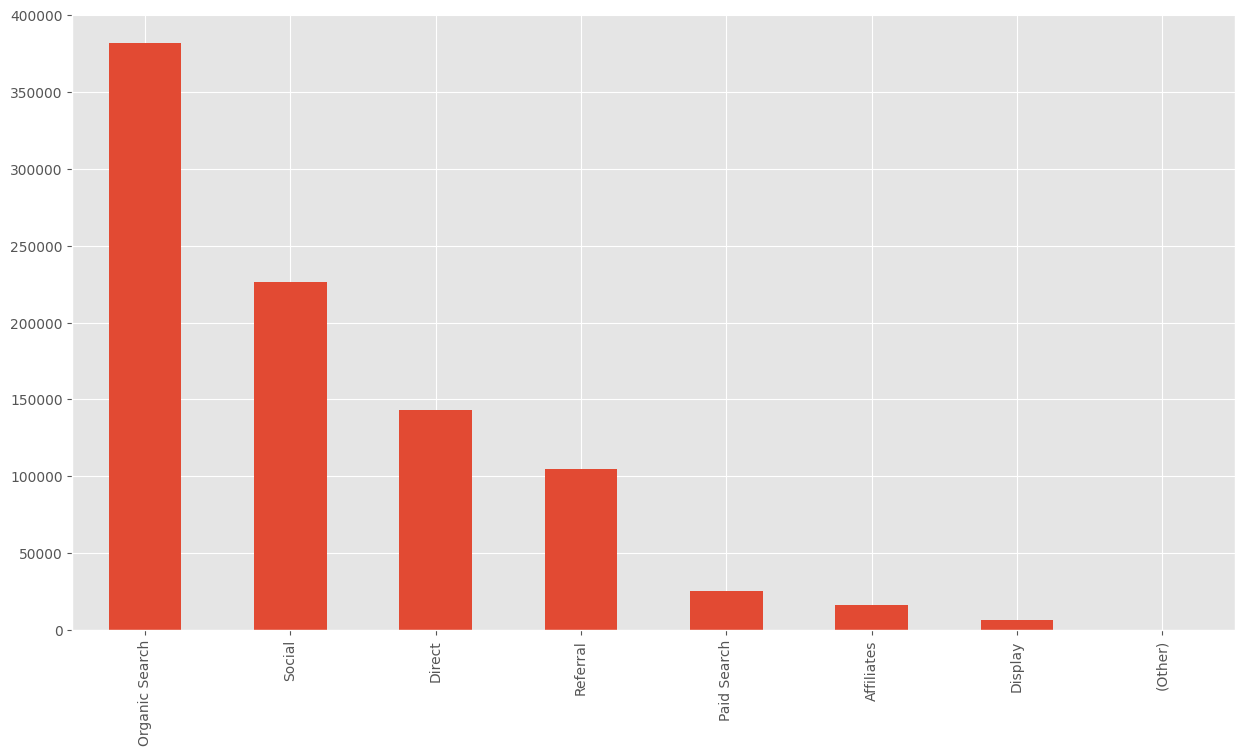

In [36]:
df['channelGrouping'].value_counts().plot(kind='bar', figsize=(15,8))

browser

In [37]:
df['browser'].value_counts()

Chrome                                         620364
Safari                                         182245
Firefox                                         37069
Internet Explorer                               19375
Edge                                            10205
Android Webview                                  7865
Safari (in-app)                                  6850
Opera Mini                                       6139
Opera                                            5643
UC Browser                                       2427
YaBrowser                                        2096
Coc Coc                                           727
Amazon Silk                                       561
Android Browser                                   553
Mozilla Compatible Agent                          374
MRCHROME                                          263
Maxthon                                           246
BlackBerry                                        184
Nintendo Browser            

<Axes: >

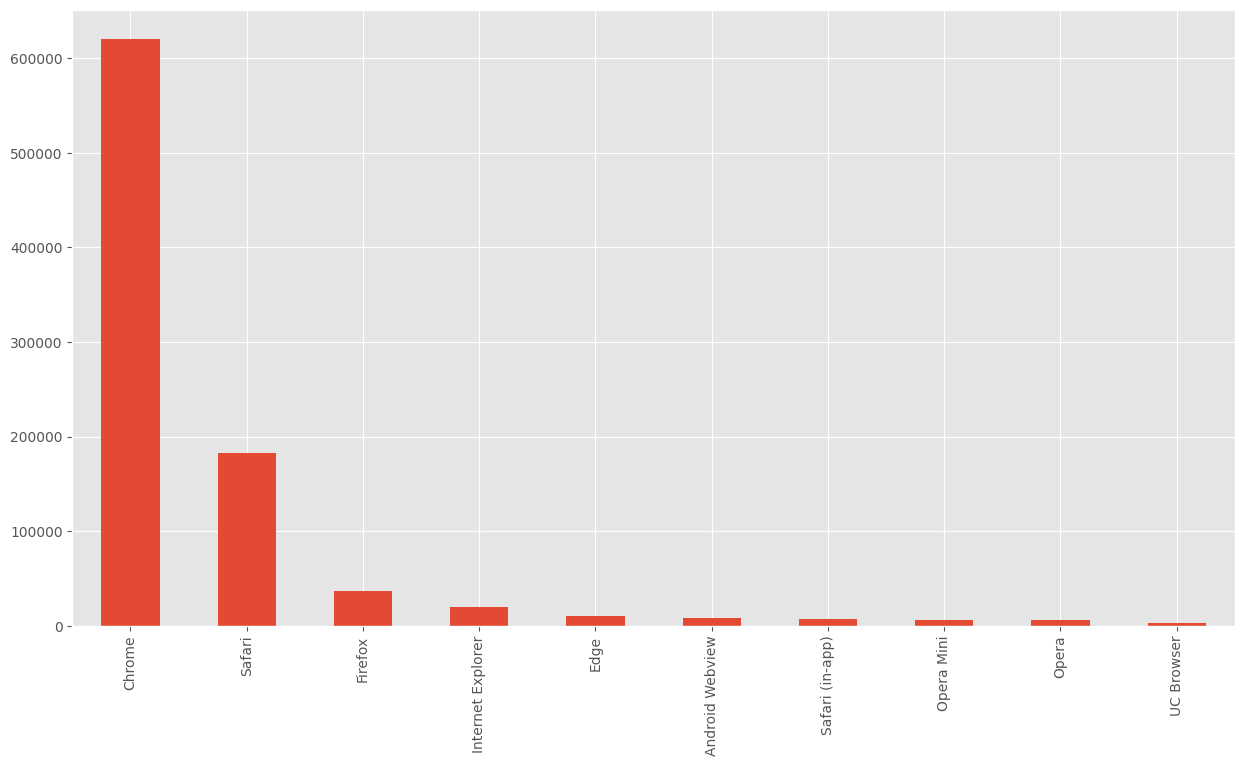

In [38]:
df['browser'].value_counts().head(10).plot(kind='bar', figsize=(15,8))

deviceCategory

In [39]:
df['deviceCategory'].value_counts()

desktop    664479
mobile     208725
tablet      30449
Name: deviceCategory, dtype: int64

<Axes: >

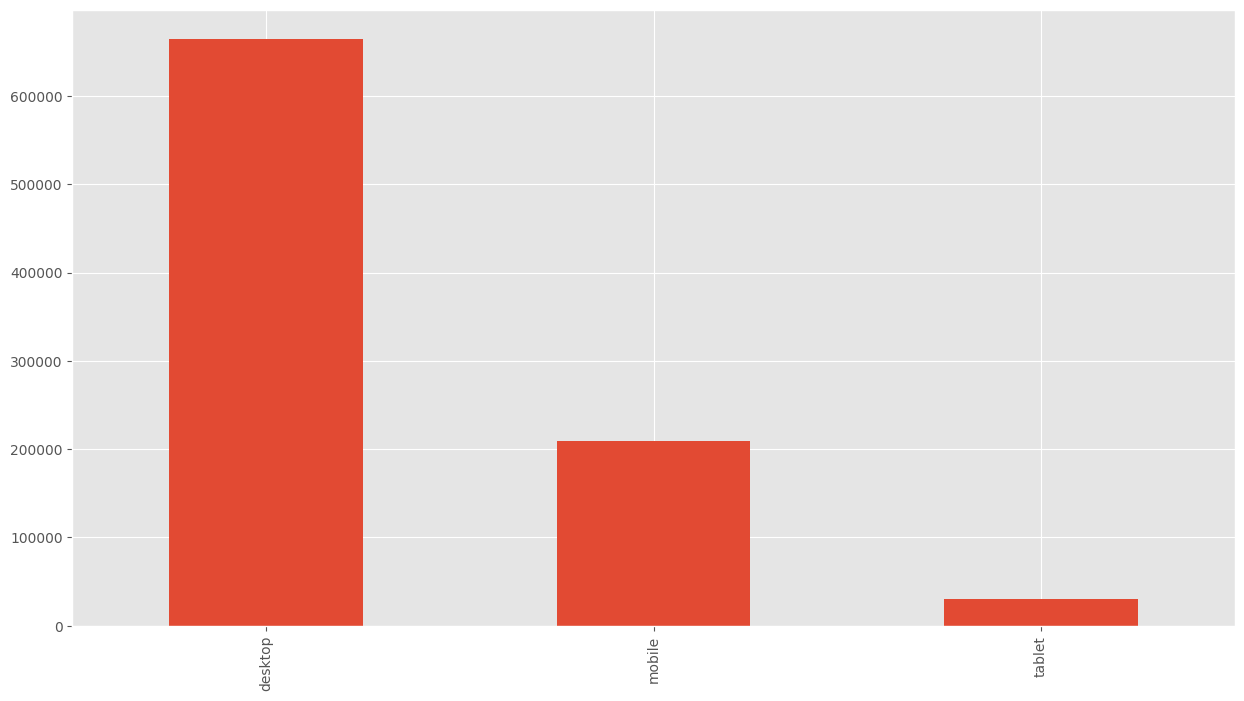

In [40]:
df['deviceCategory'].value_counts().plot(kind='bar', figsize=(15,8))

operatingSystem

In [41]:
df['operatingSystem'].value_counts()

Windows          350072
Macintosh        253938
Android          123892
iOS              107665
Linux             35034
Chrome OS         26337
(not set)          4695
Windows Phone      1216
Samsung             280
BlackBerry          218
Nintendo Wii        100
Firefox OS           89
Xbox                 66
Nintendo WiiU        35
FreeBSD               9
Nokia                 2
OpenBSD               2
NTT DoCoMo            1
Nintendo 3DS          1
SunOS                 1
Name: operatingSystem, dtype: int64

<Axes: >

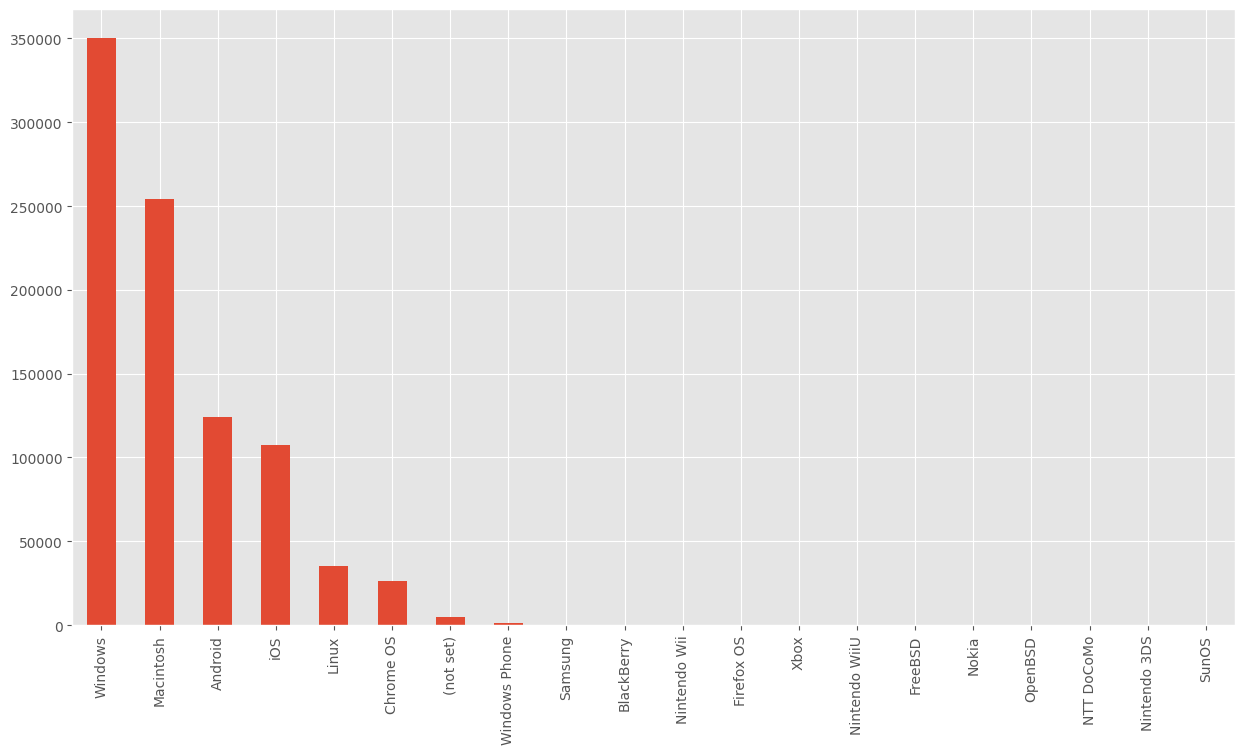

In [42]:
df['operatingSystem'].value_counts().plot(kind='bar', figsize=(15,8))

continent

In [43]:
df['continent'].value_counts()

Americas     450377
Asia         223698
Europe       198311
Oceania       15054
Africa        14745
(not set)      1468
Name: continent, dtype: int64

<Axes: >

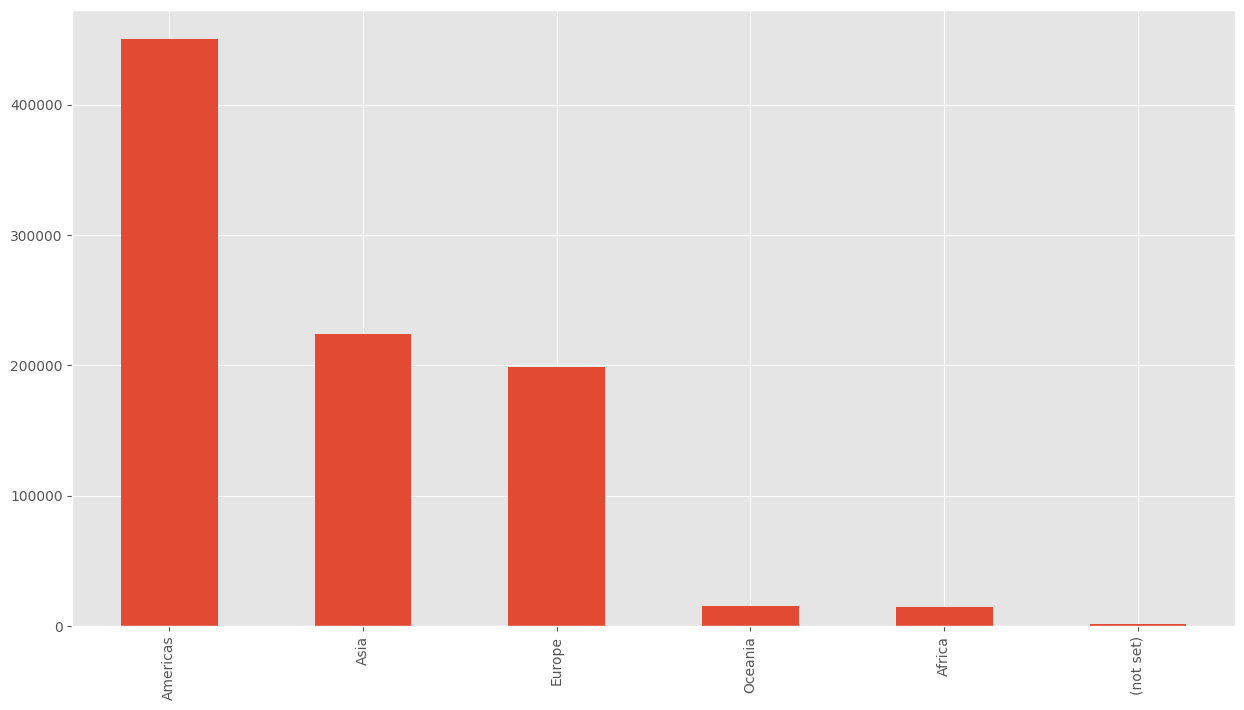

In [44]:
df['continent'].value_counts().plot(kind='bar', figsize=(15,8))

subContinent

In [45]:
df['subContinent'].value_counts()

Northern America      390657
Southeast Asia         77800
Southern Asia          59321
Western Europe         59114
Northern Europe        58168
Eastern Asia           46919
Eastern Europe         45249
South America          41731
Western Asia           38443
Southern Europe        35780
Central America        15583
Australasia            14893
Northern Africa         7683
Western Africa          2573
Caribbean               2406
Southern Africa         2169
Eastern Africa          1927
(not set)               1468
Central Asia            1215
Middle Africa            393
Melanesia                 81
Micronesian Region        55
Polynesia                 25
Name: subContinent, dtype: int64

<Axes: >

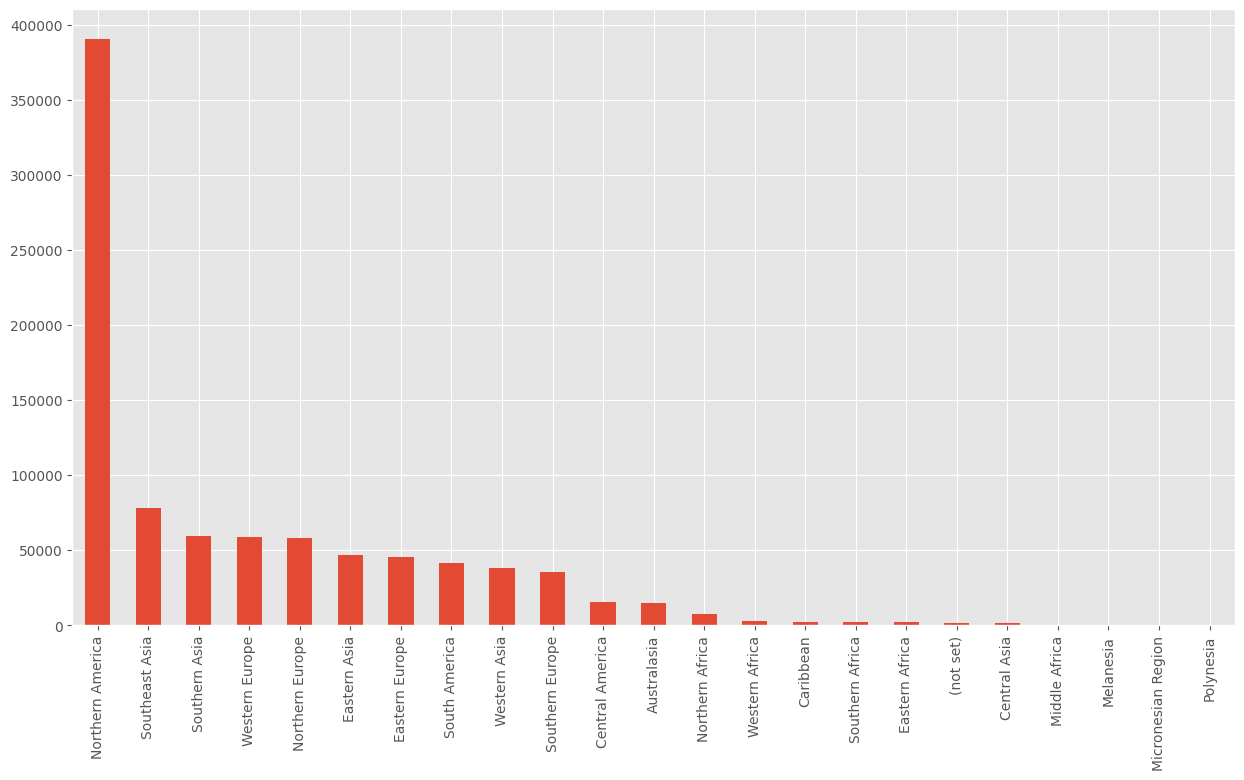

In [46]:
df['subContinent'].value_counts().plot(kind='bar',figsize=(15,8))

country

In [47]:
df['country'].value_counts()

United States            364744
India                     51140
United Kingdom            37393
Canada                    25869
Vietnam                   24598
                          ...  
St. Pierre & Miquelon         1
Anguilla                      1
American Samoa                1
Åland Islands                 1
St. Barthélemy                1
Name: country, Length: 222, dtype: int64

<Axes: >

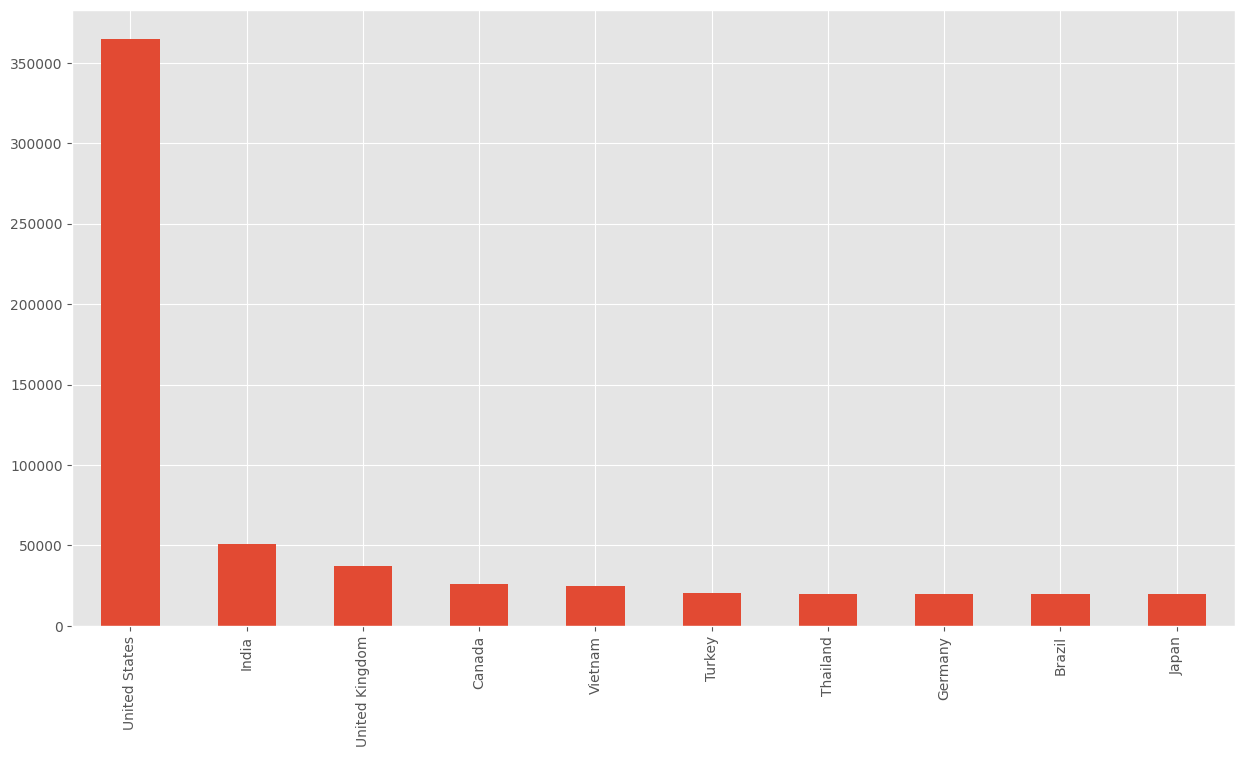

In [48]:
df['country'].value_counts().head(10).plot(kind='bar', figsize=(15,8))

region

In [49]:
df['region'].value_counts()

not available in demo dataset    508229
California                       107495
(not set)                         27827
New York                          26433
England                           13198
                                  ...  
Leiria District                       6
Assam                                 6
Kumamoto Prefecture                   5
San Salvador Department               5
Montana                               3
Name: region, Length: 376, dtype: int64

<Axes: >

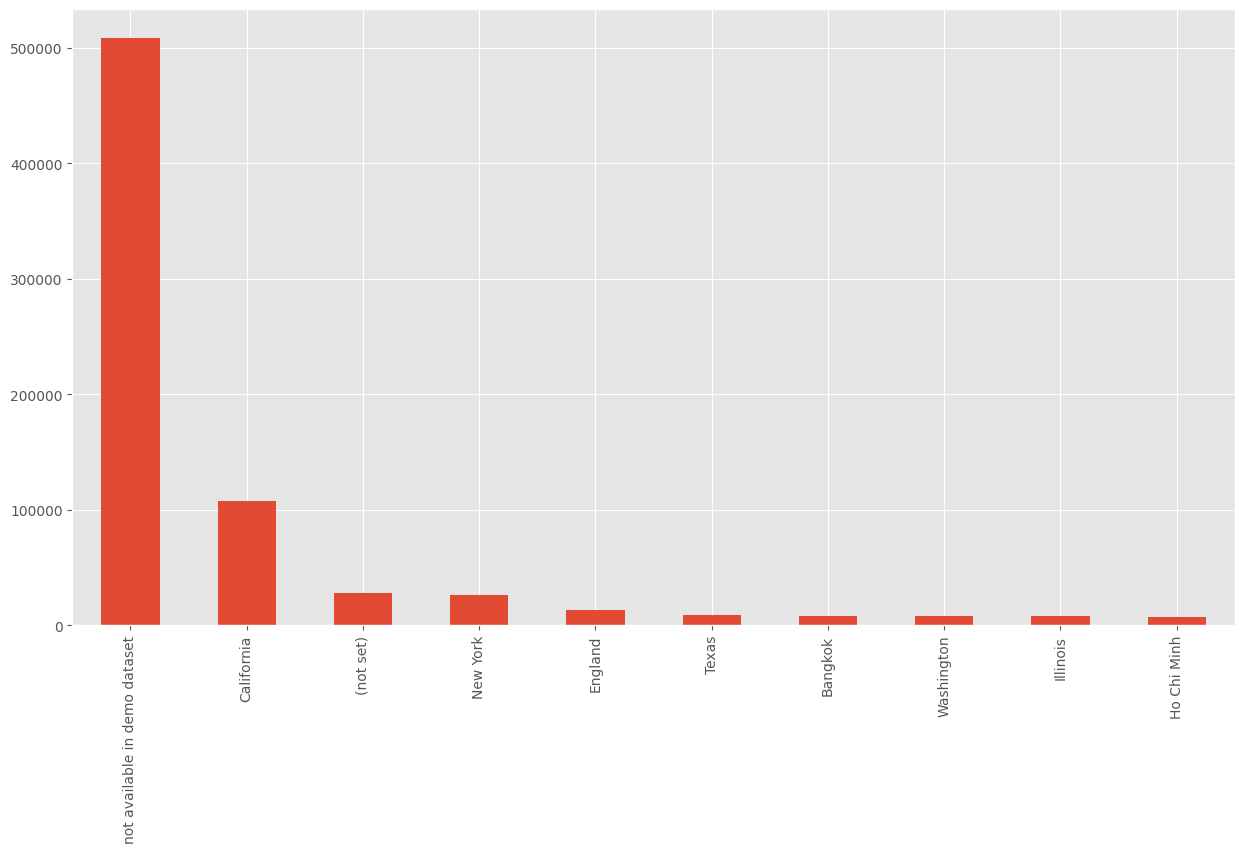

In [50]:
df['region'].value_counts().head(10).plot(kind='bar', figsize=(15,8))

medium

In [51]:
df['medium'].value_counts()

organic      381561
referral     330955
(none)       143026
cpc           25326
affiliate     16403
cpm            6262
(not set)       120
Name: medium, dtype: int64

<Axes: >

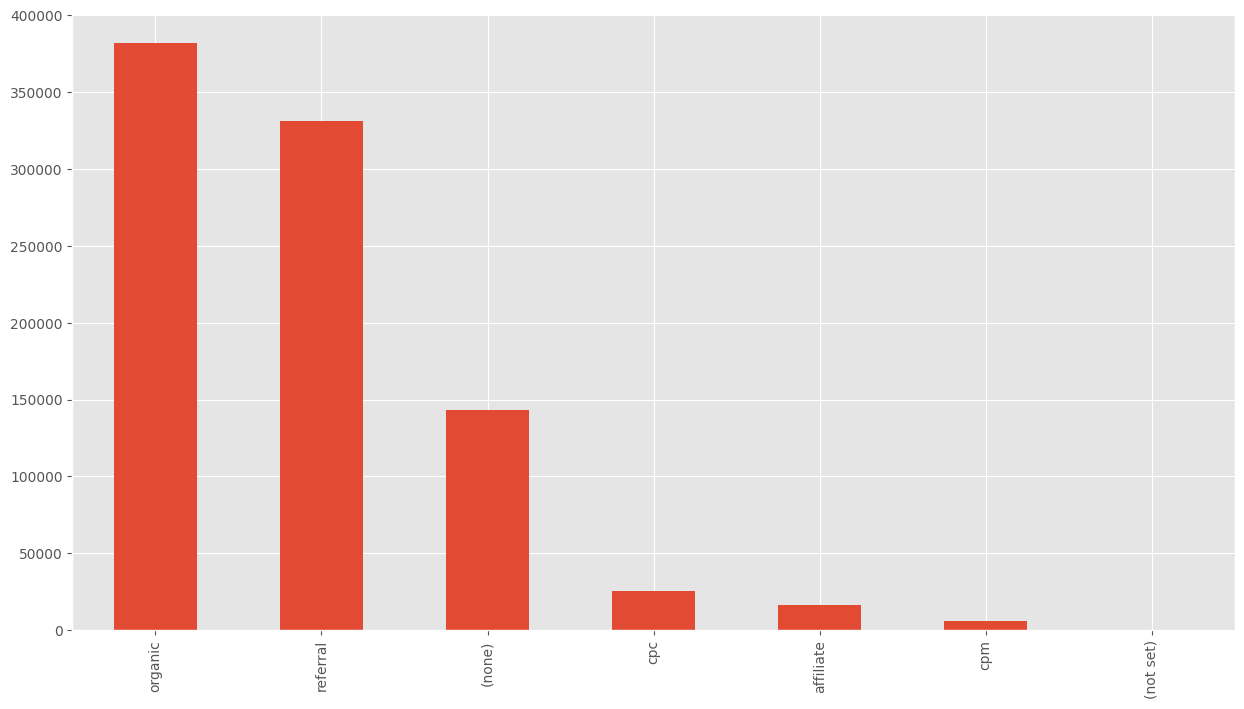

In [52]:
df['medium'].value_counts().plot(kind='bar', figsize=(15,8))

source

In [53]:
df['source'].value_counts()

google                                               400788
youtube.com                                          212602
(direct)                                             143028
mall.googleplex.com                                   66416
Partners                                              16411
                                                      ...  
google.se                                                 1
0.shared.bow.cat2.ads-bow.vu.borg.google.com:9883         1
myaccount.google.com                                      1
0.shared.bow.cat2.ads-bow.tg.borg.google.com:9864         1
0.shared.bow.cat2.ads-bow.yw.borg.google.com:9898         1
Name: source, Length: 380, dtype: int64

<Axes: >

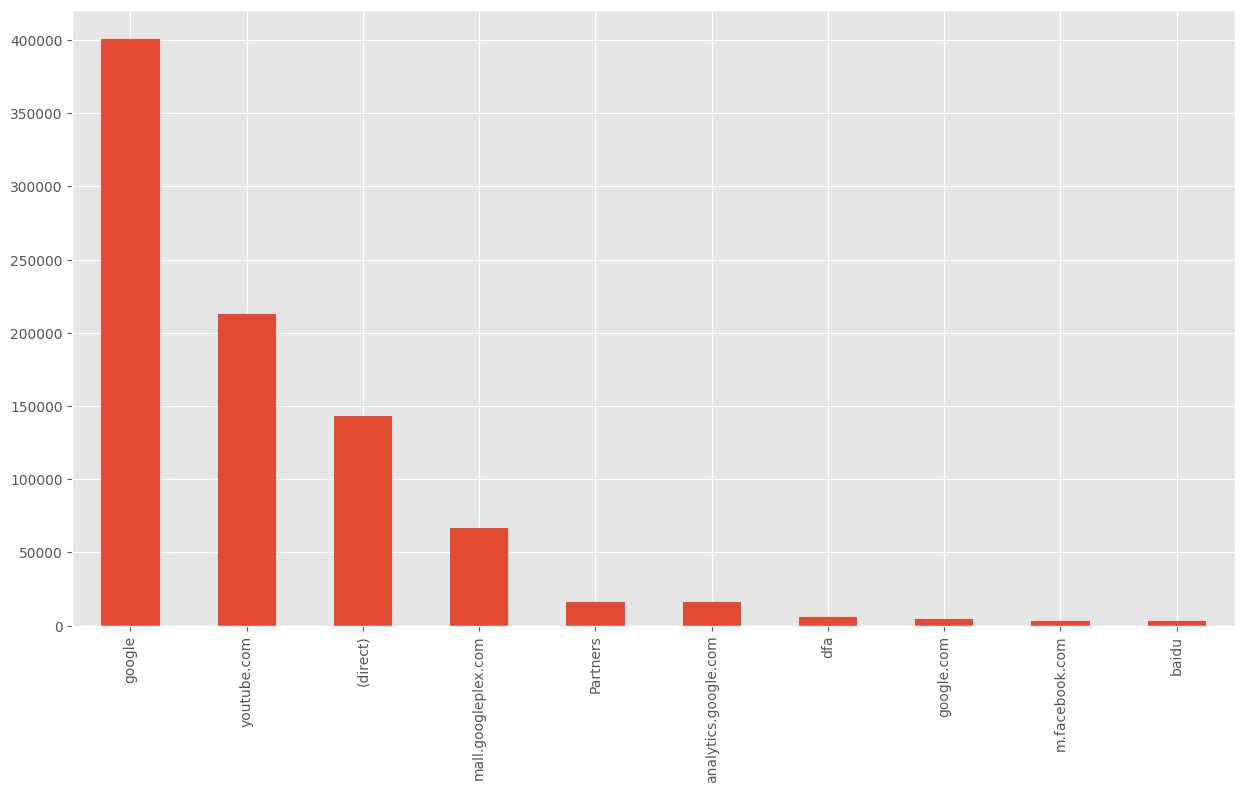

In [54]:
df['source'].value_counts().head(10).plot(kind='bar', figsize=(15,8))

year

In [55]:
df['year'].value_counts()

2017    467260
2016    436393
Name: year, dtype: int64

<Axes: >

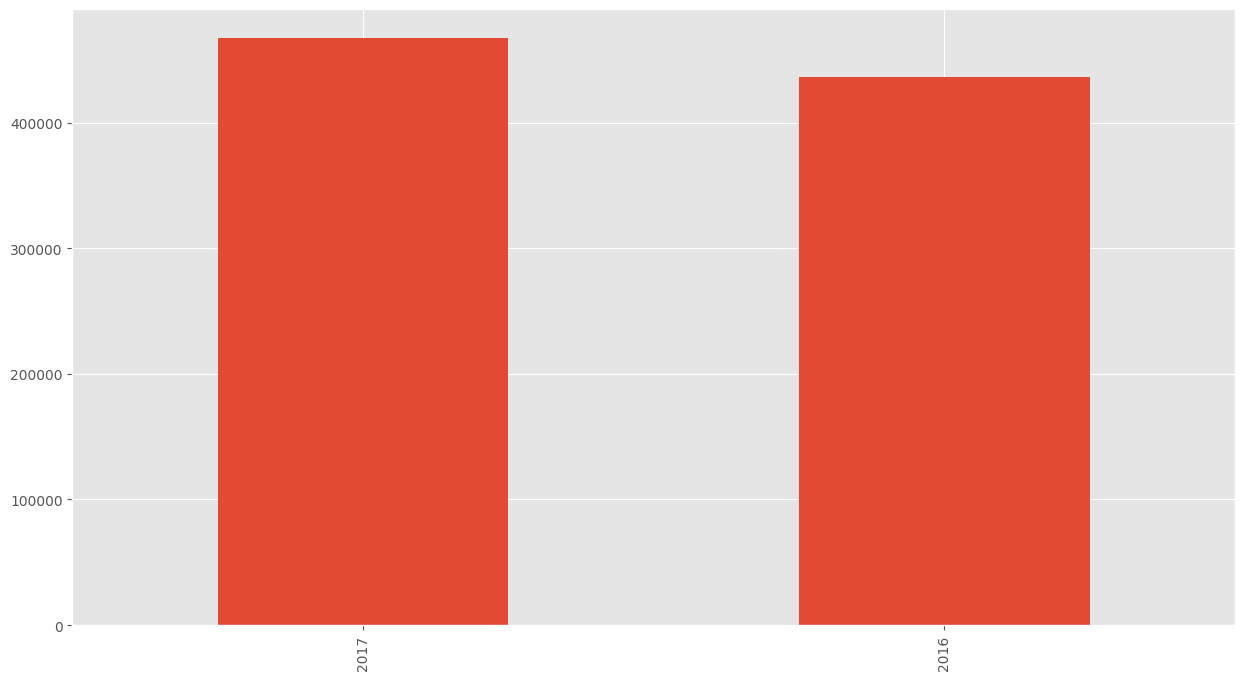

In [56]:
df['year'].value_counts().plot(kind='bar', figsize=(15,8))

group by country and hit

In [57]:
df.groupby(['country'])['hits'].count()

country
(not set)          1468
Afghanistan          57
Albania             547
Algeria            2055
American Samoa        1
                  ...  
Vietnam           24598
Yemen                96
Zambia               40
Zimbabwe             59
Åland Islands         1
Name: hits, Length: 222, dtype: int64

<Axes: ylabel='country'>

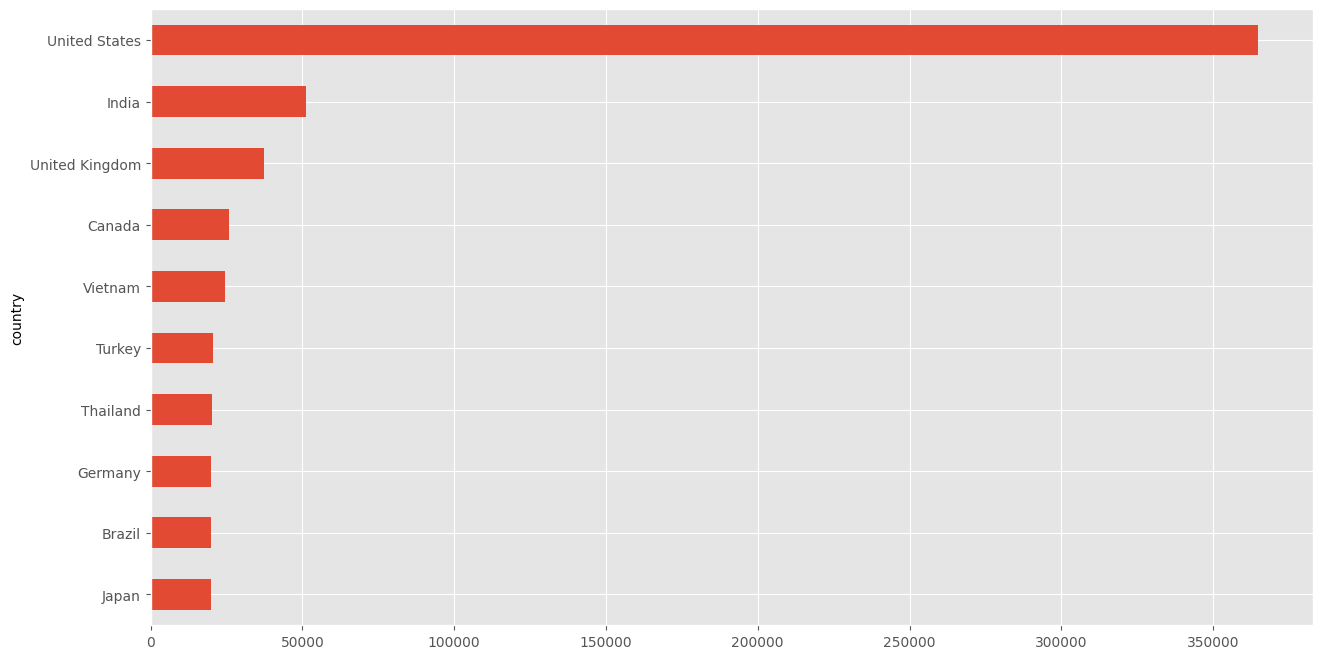

In [58]:
df.groupby(['country'])['hits'].count().sort_values().tail(10).plot(kind='barh', figsize=(15,8))

group by country and pageviews

In [59]:
df.groupby(['country'])['pageviews'].count()

country
(not set)          1466
Afghanistan          57
Albania             547
Algeria            2055
American Samoa        1
                  ...  
Vietnam           24596
Yemen                96
Zambia               40
Zimbabwe             59
Åland Islands         1
Name: pageviews, Length: 222, dtype: int64

<Axes: ylabel='country'>

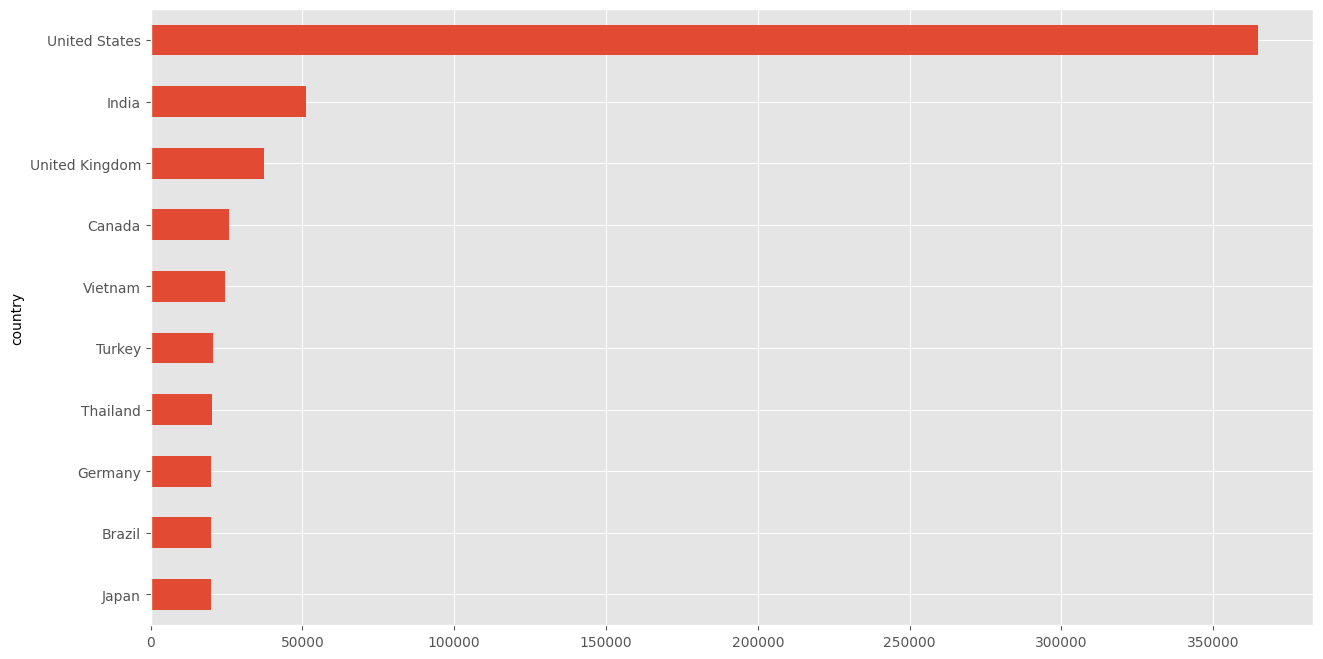

In [60]:
df.groupby(['country'])['pageviews'].count().sort_values().tail(10).plot(kind='barh', figsize=(15,8))

Doing analysis in transactionRevenue data needs to be in numeric format

In [61]:
df['transactionRevenue']=df['transactionRevenue'].fillna(0)
df['transactionRevenue']=df['transactionRevenue'].astype(np.int64)

In [62]:
df.groupby(['deviceCategory'])['transactionRevenue'].sum()

deviceCategory
desktop    1480864090000
mobile       49785810000
tablet        9421340000
Name: transactionRevenue, dtype: int64

<Axes: xlabel='deviceCategory'>

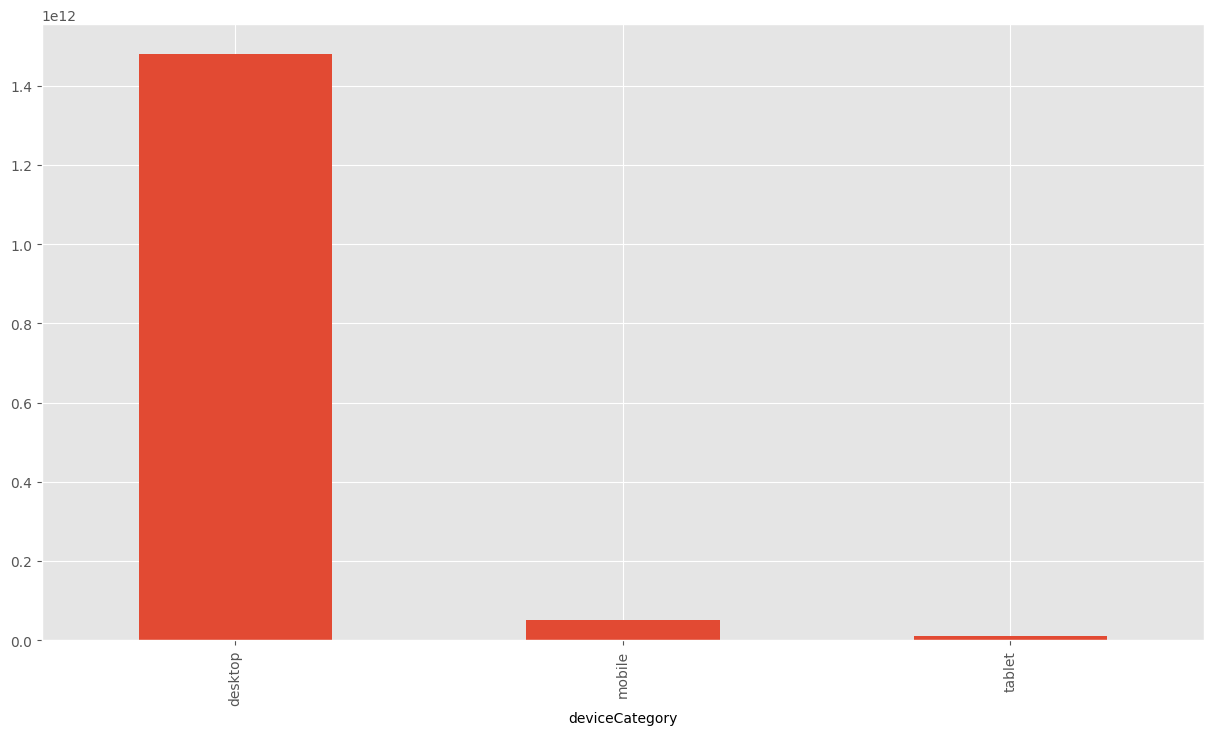

In [63]:
df.groupby(['deviceCategory'])['transactionRevenue'].sum().plot(kind='bar',figsize=(15,8))

In [64]:
df.groupby(['country'])['transactionRevenue'].sum().sort_values()

country
Laos                            0
Malta                           0
Marshall Islands                0
Martinique                      0
Mauritania                      0
                        ...      
Kenya                  5268700000
Japan                  6728990000
Venezuela             13374900000
Canada                32824540000
United States       1452440650000
Name: transactionRevenue, Length: 222, dtype: int64

<Axes: ylabel='country'>

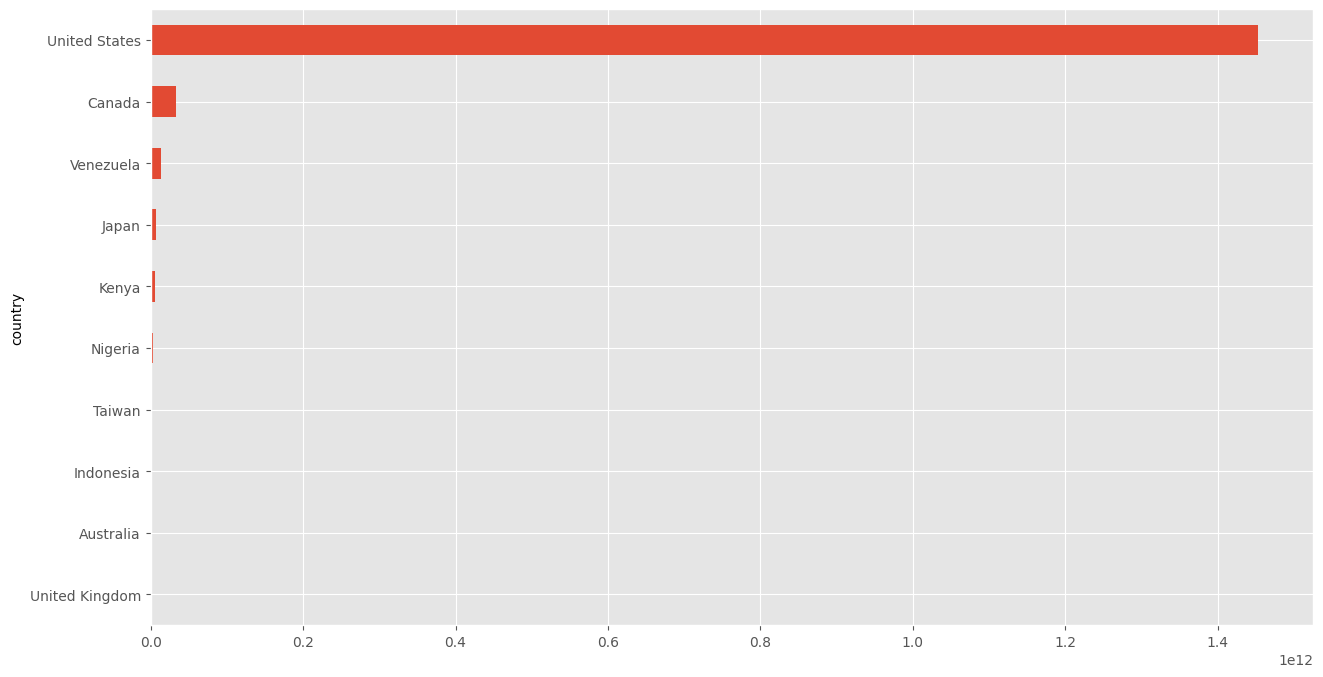

In [65]:
df.groupby(['country'])['transactionRevenue'].sum().sort_values().tail(10).plot(kind='barh', figsize=(15,8))

In [66]:
df.groupby(['browser'])['transactionRevenue'].sum().sort_values()

browser
(not set)                                                  0
MQQBrowser                                                 0
MRCHROME                                                   0
Maxthon                                                    0
Mozilla                                                    0
Mozilla Compatible Agent                                   0
Nichrome                                                   0
Nintendo Browser                                           0
Nokia Browser                                              0
NokiaE52-1                                                 0
Opera Mini                                                 0
osee2unifiedRelease                                        0
Puffin                                                     0
SeaMonkey                                                  0
Seznam                                                     0
TCL P500M                                                  0
ThumbSniper     

<Axes: ylabel='browser'>

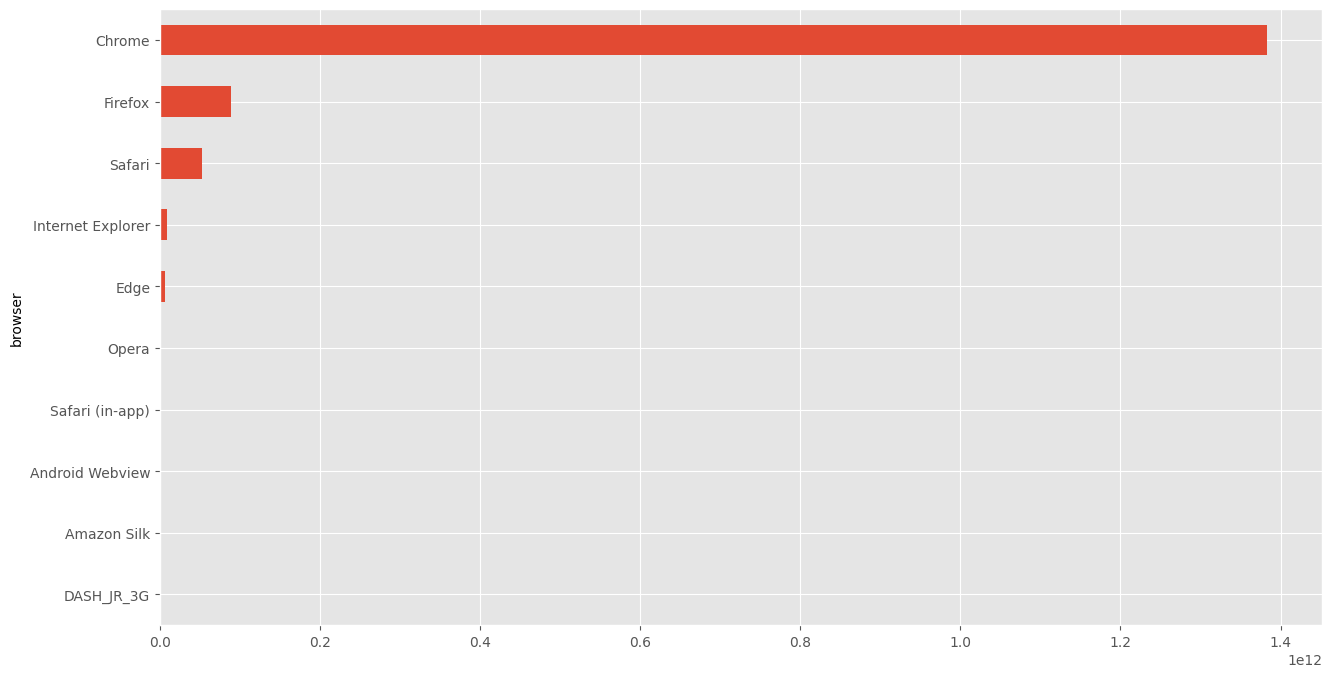

In [67]:
df.groupby(['browser'])['transactionRevenue'].sum().sort_values().tail(10).plot(kind='barh', figsize=(15,8))

In [68]:
df.groupby(['date'])['transactionRevenue'].sum().sort_values().tail(10)

date
2016-12-06    12645280000
2017-04-07    13701410000
2016-11-30    13827370000
2016-12-12    14009500000
2017-04-27    16828540000
2017-07-18    17002960000
2016-08-25    17186210000
2016-09-16    20266470000
2017-02-14    23028370000
2017-04-05    27150610000
Name: transactionRevenue, dtype: int64

<Axes: ylabel='date'>

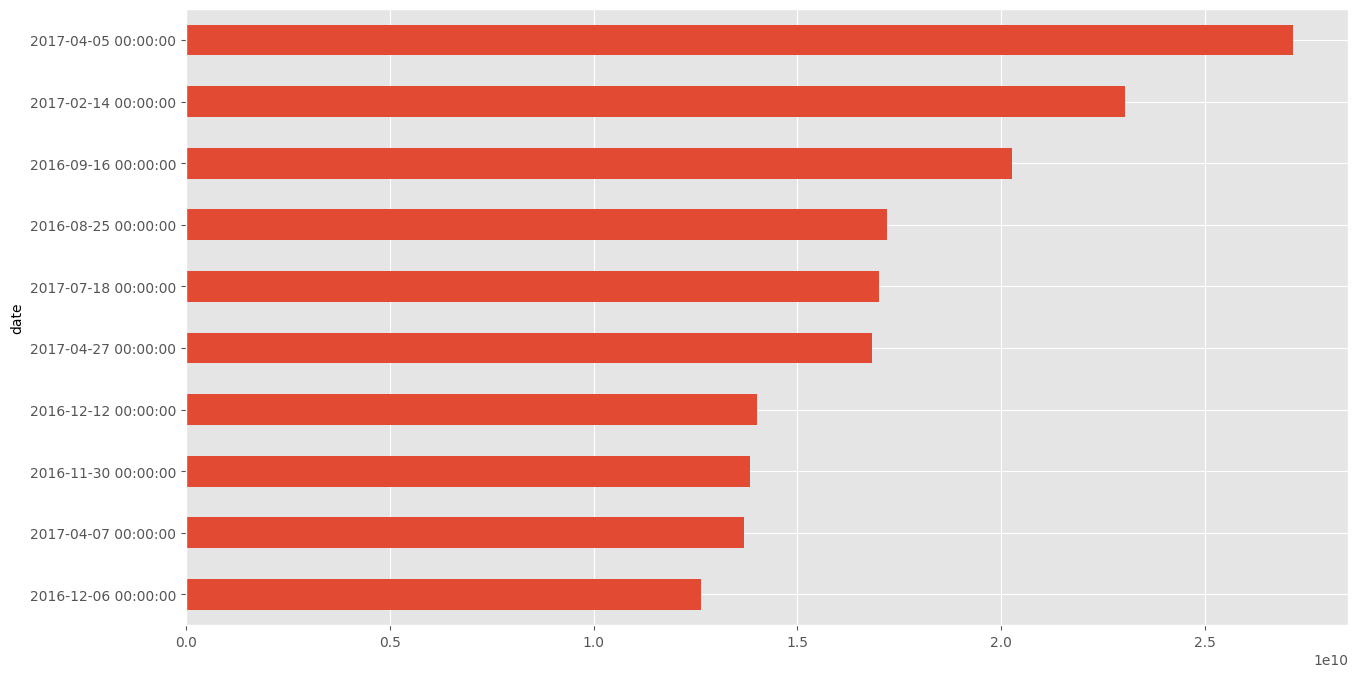

In [69]:
df.groupby(['date'])['transactionRevenue'].sum().sort_values().tail(10).plot(kind='barh', figsize=(15,8))

In [70]:
df.groupby(['channelGrouping'])['transactionRevenue'].sum()

channelGrouping
(Other)                9990000
Affiliates           597380000
Direct            434840550000
Display            78337460000
Organic Search    326380510000
Paid Search        43558900000
Referral          651429910000
Social              4916540000
Name: transactionRevenue, dtype: int64

<Axes: ylabel='channelGrouping'>

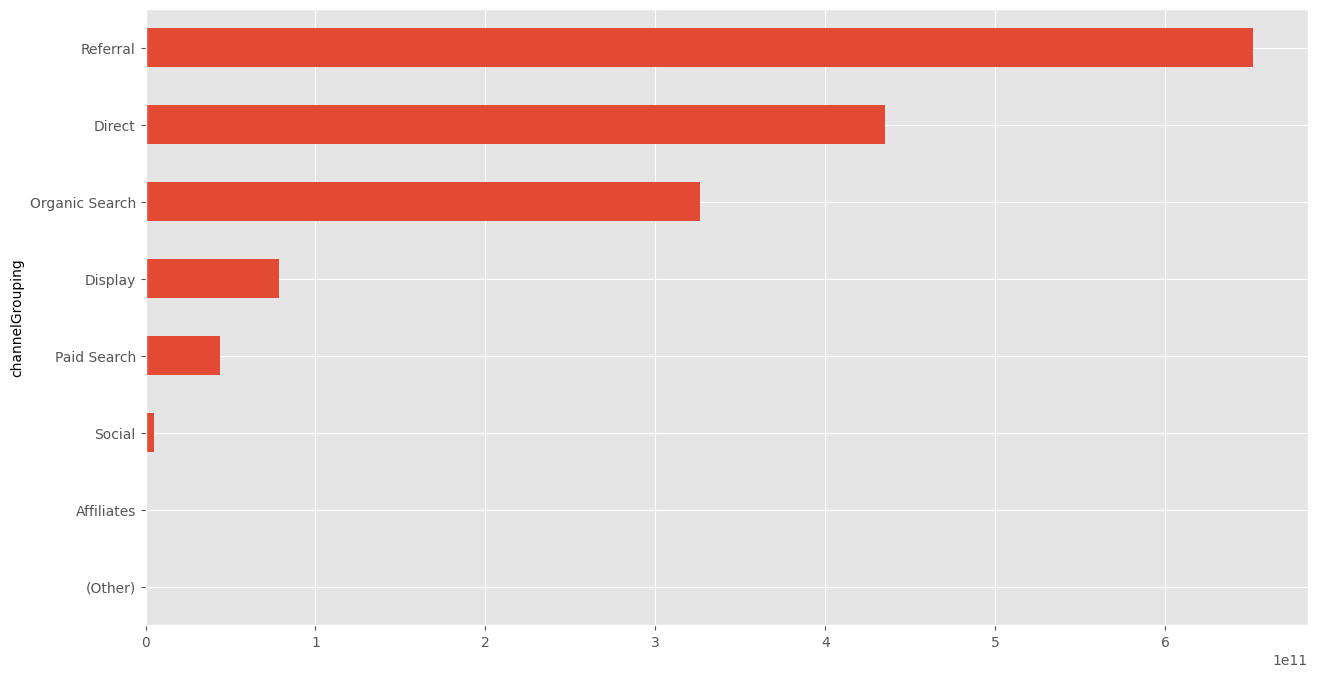

In [71]:
df.groupby(['channelGrouping'])['transactionRevenue'].sum().sort_values().plot(kind='barh', figsize=(15,8))

# Select Useful Columns

In [72]:
df=df[['channelGrouping', 'fullVisitorId', 'visitNumber','browser', 'deviceCategory', 'operatingSystem', 'continent',
       'subContinent', 'region', 'country', 'city', 'bounces', 'hits','newVisits', 'pageviews', 'visits', 'transactionRevenue',
        'campaign', 'keyword', 'medium', 'source','page','adNetworkType','month']]

df.shape

(903653, 24)

# Working with Missing Values

fill nan with 0

In [73]:
df=df.fillna(0)

convert data types to int for numeric variables

In [74]:
df['transactionRevenue']=df['transactionRevenue'].astype(np.int64)
df['hits']=df['hits'].astype(str).astype(np.int)
df['bounces']=df['bounces'].astype(str).astype(np.int)
df['newVisits']=df['newVisits'].astype(str).astype(np.int)
df['pageviews']=df['pageviews'].astype(str).astype(np.int)
df['visits']=df['visits'].astype(str).astype(np.int)

# Preprocess Data

In [75]:
#Preprocess Data
df['channelGrouping']=le.fit_transform(df['channelGrouping'].astype(str))
df['browser']=le.fit_transform(df['browser'].astype(str))
df['deviceCategory']=le.fit_transform(df['deviceCategory'].astype(str))
df['operatingSystem']=le.fit_transform(df['operatingSystem'].astype(str))
df['continent']=le.fit_transform(df['continent'].astype(str))
df['subContinent']=le.fit_transform(df['subContinent'].astype(str))
df['region']=le.fit_transform(df['region'].astype(str))
df['country']=le.fit_transform(df['country'].astype(str))
df['city']=le.fit_transform(df['city'].astype(str))
df['campaign']=le.fit_transform(df['campaign'].astype(str))
df['keyword']=le.fit_transform(df['keyword'].astype(str))
df['medium']=le.fit_transform(df['medium'].astype(str))
df['source']=le.fit_transform(df['source'].astype(str))
df['adNetworkType']=le.fit_transform(df['adNetworkType'].astype(str))

Prepare the Target Field

In [76]:
df['revenueLog']=df['transactionRevenue'].apply(lambda x :  np.log1p(x) if x>0 else 0)

# Prepare Test Data

In [77]:
test_device_df=pd.DataFrame(test['device'].apply(json.loads).tolist())[['browser','deviceCategory','operatingSystem','language','browserVersion','browserSize','mobileDeviceMarketingName','mobileDeviceModel','screenResolution']]
test_geoNetwork_df=pd.DataFrame(test['geoNetwork'].apply(json.loads).tolist())[['continent','subContinent','region','country','city','metro','networkLocation','latitude','longitude','networkDomain']]
test_totals_df=pd.DataFrame(test['totals'].apply(json.loads).tolist())[['bounces','hits','newVisits','pageviews','visits']]
test_trafficSource_df=pd.DataFrame(test['trafficSource'].apply(json.loads).tolist())[['adwordsClickInfo','campaign','keyword','medium','source','isTrueDirect','referralPath','adContent']]
test_adwordsClickInfo_df=pd.DataFrame(test_trafficSource_df['adwordsClickInfo'].apply(json.dumps).apply(json.loads).tolist())[['criteriaParameters','page','isVideoAd','gclId','adNetworkType','slot','targetingCriteria']]

test_df=pd.concat([test[['channelGrouping', 'date', 'device', 'geoNetwork','sessionId', 'socialEngagementType', 'totals', 'trafficSource',
       'visitId', 'visitNumber', 'visitStartTime']], test_device_df, test_geoNetwork_df, test_totals_df, test_trafficSource_df, test_adwordsClickInfo_df], axis=1)

test_df['date']=pd.to_datetime(test_df['date'], format="%Y%m%d")
test_df['visitStartTime']=pd.to_datetime(test_df['visitStartTime'],unit='s')
#Getting year, month and day from date
test_df['year']=test_df['date'].dt.year
test_df['month']=test_df['date'].dt.month
test_df['day']=test_df['date'].dt.day

#Getting hour and minute from visitStartTime
test_df['hour']=test_df['visitStartTime'].dt.hour
test_df['minute']=test_df['visitStartTime'].dt.minute
test_df=test_df.fillna(0)

test_df['hits']=test_df['hits'].astype(str).astype(np.int)
test_df['bounces']=test_df['bounces'].astype(str).astype(np.int)
test_df['newVisits']=test_df['newVisits'].astype(str).astype(np.int)
test_df['pageviews']=test_df['pageviews'].astype(str).astype(np.int)
test_df['visits']=test_df['visits'].astype(str).astype(np.int)

#Preprocess Data
test_df['channelGrouping']=le.fit_transform(test_df['channelGrouping'].astype(str))
test_df['browser']=le.fit_transform(test_df['browser'].astype(str))
test_df['deviceCategory']=le.fit_transform(test_df['deviceCategory'].astype(str))
test_df['operatingSystem']=le.fit_transform(test_df['operatingSystem'].astype(str))
test_df['continent']=le.fit_transform(test_df['continent'].astype(str))
test_df['subContinent']=le.fit_transform(test_df['subContinent'].astype(str))
test_df['region']=le.fit_transform(test_df['region'].astype(str))
test_df['country']=le.fit_transform(test_df['country'].astype(str))
test_df['city']=le.fit_transform(test_df['city'].astype(str))
test_df['campaign']=le.fit_transform(test_df['campaign'].astype(str))
test_df['keyword']=le.fit_transform(test_df['keyword'].astype(str))
test_df['medium']=le.fit_transform(test_df['medium'].astype(str))
test_df['source']=le.fit_transform(test_df['source'].astype(str))
test_df['adNetworkType']=le.fit_transform(test_df['adNetworkType'].astype(str))

In [78]:
test_df=test_df[['channelGrouping', 'visitNumber','browser', 'deviceCategory', 'operatingSystem', 'continent',
       'subContinent', 'region', 'country', 'city', 'bounces', 'hits','newVisits', 'pageviews', 'visits',
        'campaign', 'keyword', 'medium', 'source','page','adNetworkType','month']]

test_df.shape

(804684, 22)

# Training Model

split data into training and validation sets

In [79]:
X=df[['channelGrouping','visitNumber','browser', 'deviceCategory', 'operatingSystem', 'continent',
       'subContinent', 'region', 'country', 'city', 'bounces', 'hits','newVisits', 'pageviews', 'visits',
        'campaign', 'keyword', 'medium', 'source','page','adNetworkType','month']]
y=df['revenueLog']

X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3, random_state=7)

Training Model

In [80]:
rf_model=RandomForestRegressor()
rf_model.fit(X_train,y_train)
pred_test=rf_model.predict(X_test)
joblib.dump(rf_model,'Google Customer Revenue Prediction Model.pkl') #Save model into a pickle file

print(pred_test[0:5])
print(np.sqrt(metrics.mean_squared_error(y_test,pred_test)))

[0. 0. 0. 0. 0.]
1.7215740030381188


Feature importance

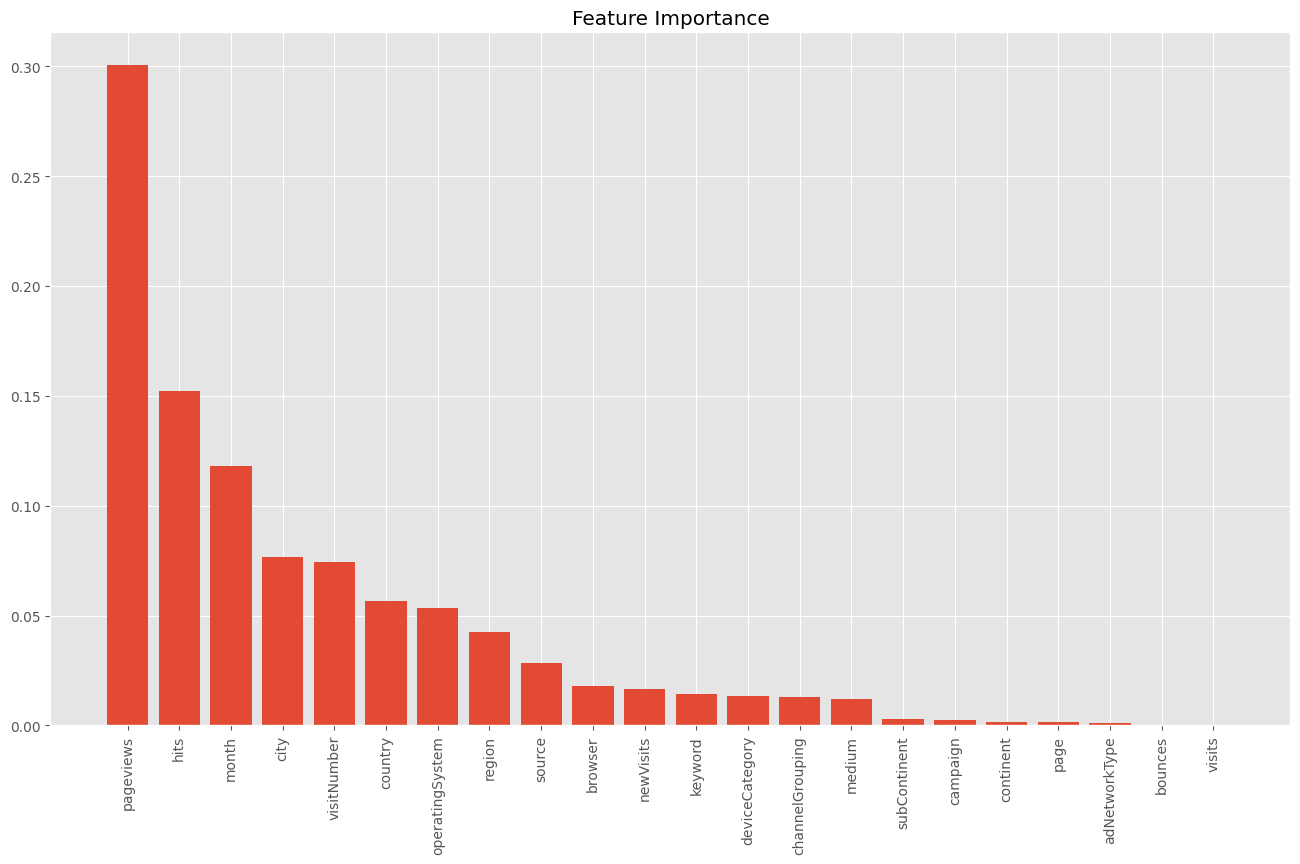

In [81]:
importances=rf_model.feature_importances_
indices=np.argsort(importances)[::-1]
features = [X.columns[i] for i in indices]

plt.figure(figsize=(16,9))
plt.title("Feature Importance")
plt.bar(range(X.shape[1]), importances[indices])
# Add feature names as x-axis labels
plt.xticks(range(X.shape[1]), features, rotation=90)
plt.show()

# Preparing Submision

In [82]:
model=joblib.load('Google Customer Revenue Prediction Model.pkl')
pred = model.predict(test_df)
test["PredictedLogRevenue"] = np.expm1(pred)
submission = test.groupby("fullVisitorId").agg({"PredictedLogRevenue" : "sum"}).reset_index()
submission["PredictedLogRevenue"] = np.log1p(submission["PredictedLogRevenue"])
submission["PredictedLogRevenue"] =  submission["PredictedLogRevenue"].apply(lambda x : 0 if x < 0 else x)
submission['fullVisitorId']=submission['fullVisitorId'].apply(lambda x : str(x))
submission.to_excel("Submission2.xlsx", index=False) #[0:617242]
submission.head()

,fullVisitorId,PredictedLogRevenue
0,3038793126460,0.0
1,9663019041506,0.0
2,10992980461157,0.0
3,17196000342279,0.0
4,18672749561458,0.0


In [83]:
submission['fullVisitorId'].dtypes

dtype('O')

In [84]:
submission.shape

(652237, 2)

In [85]:
sub=pd.read_excel("Submission2.xlsx")
samp=pd.read_csv("data/sample_submission.csv")


In [86]:
j=pd.merge(sub,samp, on='fullVisitorId', how='right')
j.to_csv("Submission.csv")
j.head()

,fullVisitorId,PredictedLogRevenue_x,PredictedLogRevenue_y
0,0000000259678714014,0.339059,0.0
1,0000049363351866189,0.000000,0.0
2,0000053049821714864,0.000000,0.0
3,0000059488412965267,0.000000,0.0
4,0000085840370633780,0.000000,0.0
